In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv('Rajasthan_1990_2022_Jodhpur.csv')

In [4]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [7]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

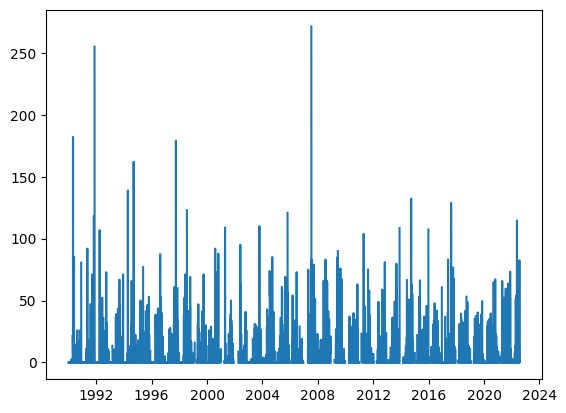

In [8]:
plt.plot(df['time'],df['prcp'])

In [9]:
data=df[['time','prcp']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_23420\1627567933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
1,1990-01-02,0.0
2,1990-01-03,0.0
3,1990-01-04,0.0
4,1990-01-05,0.0
7,1990-01-08,0.0


In [10]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [11]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 86.912% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (228) is too small than the required number                     for the learning rate finder (246). The results might not be optimal.


Finding best initial lr:   0%|          | 0/246 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,24.784004,30.909454,0.427031,0.0,0
1,21.959438,27.577579,0.353154,0.0,1
2,19.281519,24.417311,0.286220,0.0,2
3,16.773916,21.526583,0.227102,0.0,3
4,14.558813,18.999409,0.179277,0.0,4
...,...,...,...,...,...
995,5.481547,10.890087,0.058244,0.0,995
996,5.476762,10.944381,0.058212,0.0,996
997,5.484910,10.963297,0.058496,0.0,997
998,5.481346,10.900250,0.058245,0.0,998


In [13]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 86.912% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 228it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,4.324961,3.689391,0.636016,-0.000445
1,2022-07-27,None,4.193211,3.689224,0.719878,-0.215892
2,2022-07-28,None,4.586359,3.689058,0.800670,0.096631
3,2022-07-29,None,5.031693,3.688892,0.878235,0.464566
4,2022-07-30,None,4.437003,3.688725,0.951980,-0.203702


In [14]:
plot1=model.plot(forecast)


In [15]:
plot1


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '5f417ae9-a877-4866-b1a4-57b0098613c3',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([4.324961 , 4.1932106, 4.586359 , ..., 0.7040014, 1.0145164, 1.38172  ],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '

In [12]:
with open('jodhpur_prec_model.pkl','wb') as f:
    pickle.dump(model,f)